In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('../data/athletes.csv')
df_v1 = df.copy()
data = df.copy()

In [5]:
df_v1.to_csv('../data/athletes_v1.csv', index=False)

### In powershell

`lakectl fs upload --src C:\Users\dkill\ADSP UCHICAGO\Q4\MLOps_Assignment1\data\athletes_v1.csv --dst lakefs://mlops-data/main/athletes_v1.csv`

`lakectl commit lakefs://mlops-data/main -m "Add athletes v1 dataset"`

In [6]:
# Remove not relevant columns
data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                           'train','background','experience','schedule','howlong', \
                           'deadlift','candj','snatch','backsq','experience',\
                           'background','schedule','howlong'])
data = data.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                          'filthy50','fgonebad','run400','run5k','pullups','train'])

    # Remove Outliers

data = data[data['weight'] < 1500]
data = data[data['gender'] != '--']
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[(data['deadlift'] > 0) & (data['deadlift'] <= 1105)|((data['gender'] == 'Female') \
                 & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

    # Clean Survey Data

decline_dict = {'Decline to answer|': np.nan}
data = data.replace(decline_dict)
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

In [7]:
df_v2 = data.copy()

In [8]:
df_v2.to_csv('../data/athletes_v2.csv', index=False)

### In powershell

`lakectl fs upload --src C:\Users\dkill\ADSP UCHICAGO\Q4\MLOps_Assignment1\data\athletes_v2.csv --dst lakefs://mlops-data/main/athletes_v2.csv`

`lakectl commit lakefs://mlops-data/main -m "Add athletes v2 dataset"`

## Adding total lift and train/test split

In [9]:
df_v1['total_lift'] = df_v1[['deadlift', 'candj', 'snatch', 'backsq']].sum(axis=1)
df_v2['total_lift'] = df_v2[['deadlift', 'candj', 'snatch', 'backsq']].sum(axis=1)

features = ['age', 'weight', 'height', 'gender']
target = 'total_lift'

df_v1['gender'] = df_v1['gender'].map({'Male': 0, 'Female': 1})
df_v2['gender'] = df_v2['gender'].map({'Male': 0, 'Female': 1})

In [10]:
from sklearn.model_selection import train_test_split

X_v1 = df_v1[features]
y_v1 = df_v1[target]

X_v2 = df_v2[features]
y_v2 = df_v2[target]

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.2, random_state=42)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

## Version 1 

### EDA

In [11]:
df_v1.shape

(423006, 28)

In [12]:
df_v1.describe()

,athlete_id,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,total_lift
count,423003.000000,331054.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04,4.230060e+05
mean,292748.166538,0.411196,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04,4.655826e+02
std,184969.660327,0.492051,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06,6.949772e+04
min,82.000000,0.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00,-2.200000e+01
25%,135091.500000,0.000000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01,0.000000e+00
50%,275839.000000,0.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01,0.000000e+00
75%,473188.000000,1.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01,4.300000e+02
max,633083.000000,1.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09,3.355443e+07


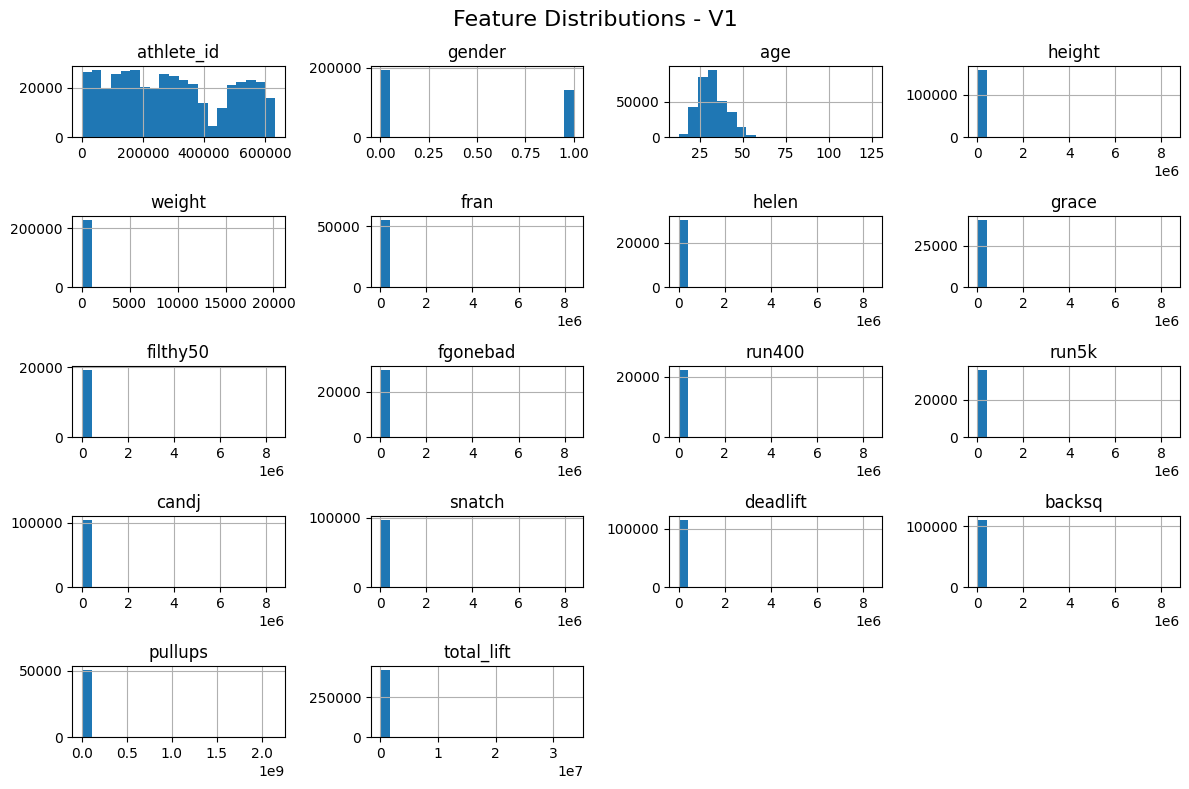

In [13]:
df_v1.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions - V1", fontsize=16)
plt.tight_layout()
plt.show()

### Baseline Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_v1 = RandomForestRegressor(random_state=42)
model_v1.fit(X_train_v1, y_train_v1)
y_pred_v1 = model_v1.predict(X_test_v1)

# Metrics
mae_v1 = mean_absolute_error(y_test_v1, y_pred_v1)
rmse_v1 = np.sqrt(mean_squared_error(y_test_v1, y_pred_v1))
r2_v1 = r2_score(y_test_v1, y_pred_v1)

print(f"V1 Model Metrics:\nMAE: {mae_v1:.2f}\nRMSE: {rmse_v1:.2f}\nR²: {r2_v1:.2f}")

V1 Model Metrics:
MAE: 1011.50
RMSE: 133093.50
R²: -0.01


## Version 2

### EDA

In [15]:
df_v2.shape

(30029, 15)

In [16]:
df_v2.describe()

,gender,age,height,weight,candj,snatch,deadlift,backsq,total_lift
count,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000,30029.000000
mean,0.273269,32.123847,68.871924,177.130607,205.418396,156.174198,361.933997,294.118818,1017.645409
std,0.445645,7.435425,3.774937,32.399828,58.687508,48.833572,96.745441,85.081340,277.682895
min,0.000000,18.000000,52.000000,5.000000,1.000000,1.000000,0.000000,1.000000,4.000000
25%,0.000000,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000,805.000000
50%,0.000000,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000,1040.000000
75%,1.000000,37.000000,72.000000,197.000000,245.000000,190.000000,434.000000,355.000000,1224.000000
max,1.000000,56.000000,83.000000,474.000000,390.000000,386.000000,1000.000000,882.000000,2135.000000


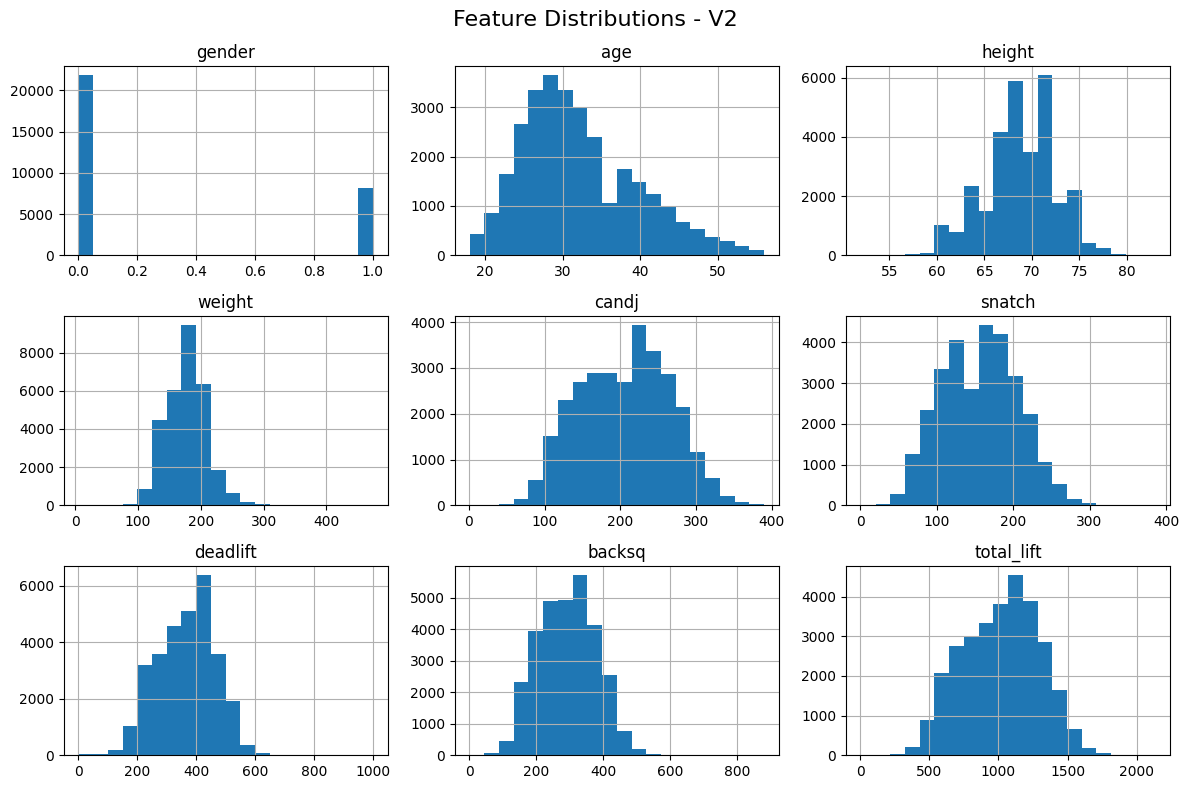

In [17]:
df_v2.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions - V2", fontsize=16)
plt.tight_layout()
plt.show()

### Baseline Model

In [18]:
model_v2 = RandomForestRegressor(random_state=42)
model_v2.fit(X_train_v2, y_train_v2)
y_pred_v2 = model_v2.predict(X_test_v2)

# Metrics
mae_v2 = mean_absolute_error(y_test_v2, y_pred_v2)
rmse_v2 = np.sqrt(mean_squared_error(y_test_v2, y_pred_v2))
r2_v2 = r2_score(y_test_v2, y_pred_v2)

print(f"V2 Model Metrics:\nMAE: {mae_v2:.2f}\nRMSE: {rmse_v2:.2f}\nR²: {r2_v2:.2f}")


V2 Model Metrics:
MAE: 143.28
RMSE: 184.52
R²: 0.56


## Comparision

In [19]:
results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2'],
    'V1': [mae_v1, rmse_v1, r2_v1],
    'V2': [mae_v2, rmse_v2, r2_v2]
})
results


,Metric,V1,V2
0,MAE,1011.500807,143.280527
1,RMSE,133093.504201,184.519467
2,R2,-0.013903,0.556726
